# Xây dựng mô hình Machine Learning dự đoán điểm thi của sinh viên dựa trên điểm thành phần

Dataset là bảng điểm của 4 lớp: lop71, lop72, lop31, lop32

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Loading data

In [2]:
df_31 = pd.read_csv('./lop31.csv')
df_31.dtypes, df_31.head()

(ho_ten     object
 10%       float64
 20%       float64
 20%.1     float64
 thi       float64
 dtype: object,
    ho_ten    10%   20%  20%.1   thi
 0  31_011  8.375  7.25    8.5   9.0
 1  31_012  8.250  7.25    8.5   9.0
 2  31_013  8.500  7.50    8.5  10.0
 3  31_014  4.000  7.25    8.5   9.0
 4  31_015  8.750  7.50    8.5   9.5)

### Phát hiện bảng điểm của lớp 32 có dữ liệu chưa ở dạng số, cần xử lý (VD: 7,5 -> 7.5)

In [3]:
df_32 = pd.read_csv('./lop32.csv')
df_32.dtypes, df_32.head()

(ho_ten         object
 10%            object
 20%            object
 BT bo sung    float64
 20%.1         float64
 thi           float64
 dtype: object,
    ho_ten   10%   20%  BT bo sung  20%.1   thi
 0  32_011  7.25   6.5        6.00   6.50  6.75
 1  32_012     7   7.5        5.00   7.50  7.00
 2  32_013     7  7.25        5.25   7.25  7.00
 3  32_014   6.5     7        5.25   7.00  6.50
 4  32_015   7.5     7        5.00   7.00  7.25)

In [4]:
df_32 = df_32.drop("BT bo sung", axis=1)

In [5]:
df_32["10%"].unique(), df_32["20%"].unique()

(array(['7.25', '7', '6.5', '7.5', '8', '9', '9.5', '9.25', '9.375',
        '9.125', '7,5', '6.75', '6', '7.75', '0', '8.125', '8.75', '8.5',
        '8.25', '7.625', '5.5', '4', '3.5'], dtype=object),
 array(['6.5', '7.5', '7.25', '7', '6.75', '6.25', '6', '7.375', '7.75',
        '8.25', '6,5', '6,75', '8', '6.8', '6.125', '3.123', '5.5', '3.75',
        '3.5', '7.875', '6.875', '8.75', '3'], dtype=object))

In [6]:
df_32['10%'] = df_32['10%'].str.replace(',','.')
df_32["10%"] = pd.to_numeric(df_32["10%"], errors='coerce')

df_32['20%'] = df_32['20%'].str.replace(',','.')
df_32["20%"] = pd.to_numeric(df_32["20%"], errors='coerce')

In [7]:
df_71 = pd.read_csv('./lop71.csv')
df_71.dtypes, df_71.head()

(ho_ten     object
 10%       float64
 20%       float64
 20%.1     float64
 thi       float64
 dtype: object,
    ho_ten   10%  20%  20%.1   thi
 0  71_011  6.50  6.5    6.0  6.50
 1  71_012  5.50  5.5    6.0  5.00
 2  71_013  6.50  7.0    7.0  6.75
 3  71_014  7.25  5.5    7.0  6.00
 4  71_021  7.50  5.0    6.0  6.00)

In [8]:
df_72 = pd.read_csv('./lop72.csv')
df_72.dtypes, df_72.head()

(ho_ten     object
 10%       float64
 20%       float64
 20%.1     float64
 thi       float64
 dtype: object,
    ho_ten   10%   20%  20%.1   thi
 0  72_011  6.00  6.50   7.00  6.75
 1  72_012  6.50  7.25   7.75  7.50
 2  72_013  5.75  6.75   7.25  7.00
 3  72_014  6.75  7.00   7.50  7.25
 4  72_015  6.00  6.50   7.00  6.75)

### Gộp dữ liệu của 4 lớp vào df

In [9]:
df = pd.concat([df_31, df_32, df_71, df_72], axis=0)
df.dtypes

ho_ten     object
10%       float64
20%       float64
20%.1     float64
thi       float64
dtype: object

### Xử lí dữ liệu theo hệ số điểm: 10% 20% 20% 50%

In [10]:
df.head()

,ho_ten,10%,20%,20%.1,thi
0,31_011,8.375,7.25,8.5,9.0
1,31_012,8.250,7.25,8.5,9.0
2,31_013,8.500,7.50,8.5,10.0
3,31_014,4.000,7.25,8.5,9.0
4,31_015,8.750,7.50,8.5,9.5


In [11]:
df["10%"] = df["10%"] * 0.1
df["20%"] = df["20%"] * 0.2
df["20%.1"] = df["20%.1"] * 0.2
df["thi"] = df["thi"] * 0.5

In [12]:
df.head()

,ho_ten,10%,20%,20%.1,thi
0,31_011,0.8375,1.45,1.7,4.50
1,31_012,0.8250,1.45,1.7,4.50
2,31_013,0.8500,1.50,1.7,5.00
3,31_014,0.4000,1.45,1.7,4.50
4,31_015,0.8750,1.50,1.7,4.75


In [13]:
df = df.drop("ho_ten", axis=1)

## Checking missing values

In [14]:
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
10%      2
20%      2
20%.1    2
thi      4
dtype: int64


In [15]:
# df.fillna(df.mean(), inplace=True)
df.dropna(axis=0, inplace=True)

In [16]:
df.isnull().sum()

10%      0
20%      0
20%.1    0
thi      0
dtype: int64

## Normalization -  MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.transform(df)
df_scaled = pd.DataFrame(scaled, columns=['10%', '20%', '20%.1', 'thi'])
df_scaled

,10%,20%,20%.1,thi
0,0.8375,0.828571,0.894737,0.90
1,0.8250,0.828571,0.894737,0.90
2,0.8500,0.857143,0.894737,1.00
3,0.4000,0.828571,0.894737,0.90
4,0.8750,0.857143,0.894737,0.95
...,...,...,...,...
288,0.7375,0.742857,0.789474,0.70
289,0.7250,0.771429,0.736842,0.70
290,0.7125,0.771429,0.710526,0.70
291,0.7750,0.728571,0.789474,0.70


In [18]:
# scaler.inverse_transform(scaled)

## Xem độ tương quan giữa các features

In [19]:
corr = df_scaled.corr()
corr

,10%,20%,20%.1,thi
10%,1.000000,0.591100,0.624201,0.595732
20%,0.591100,1.000000,0.792902,0.783534
20%.1,0.624201,0.792902,1.000000,0.921541
thi,0.595732,0.783534,0.921541,1.000000


<AxesSubplot:>

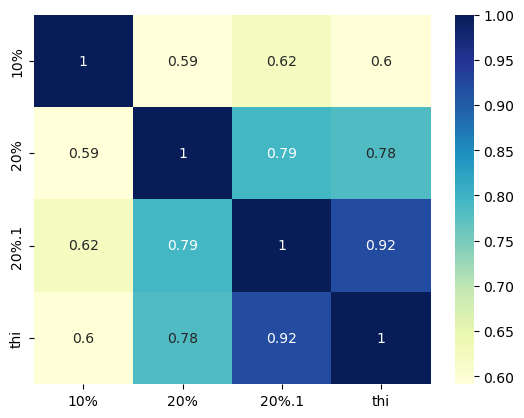

In [20]:
sns.heatmap(corr, cmap="YlGnBu", annot=True)

## Trực quan hóa dữ liệu

#### Tương quan giữa điểm 10% và điểm thi

Text(0, 0.5, 'thi')

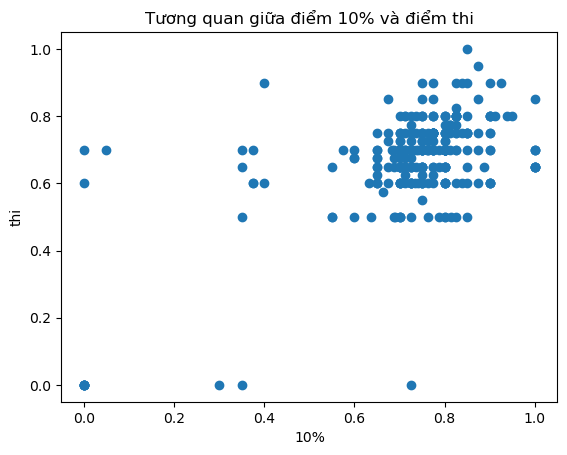

In [21]:
plt.scatter(df_scaled["10%"], df_scaled["thi"])
plt.title("Tương quan giữa điểm 10% và điểm thi")
plt.xlabel("10%")
plt.ylabel("thi")

#### Tương quan giữa điểm 20% và điểm thi

Text(0, 0.5, 'thi')

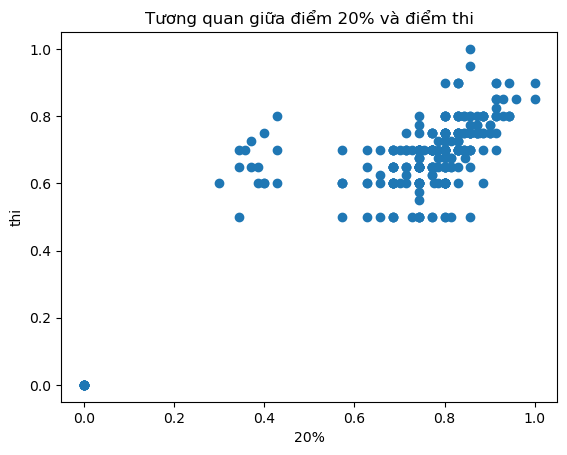

In [22]:
plt.scatter(df_scaled["20%"], df_scaled["thi"])
plt.title("Tương quan giữa điểm 20% và điểm thi")
plt.xlabel("20%")
plt.ylabel("thi")

#### Tương quan giữa điểm 20%.1 và điểm thi

Text(0, 0.5, 'thi')

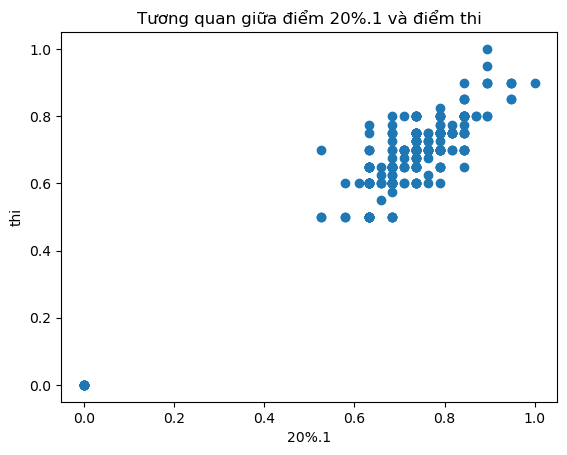

In [23]:
plt.scatter(df_scaled["20%.1"], df_scaled["thi"])
plt.title("Tương quan giữa điểm 20%.1 và điểm thi")
plt.xlabel("20%.1")
plt.ylabel("thi")

##### Từ đó thấy được, điểm thành phần cao -> điểm thi cao (tuyến tính)

### Xem phân phối điểm thi

<AxesSubplot:>

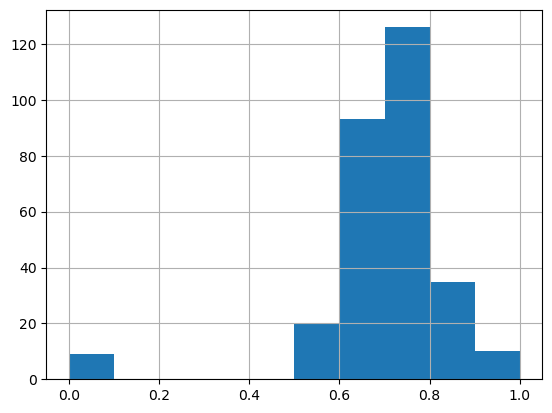

In [24]:
df_scaled["thi"].hist()

## Chia tập dữ liệu thành các tập train, test

In [25]:
X = df_scaled.drop("thi", axis=1) # Vì cột họ tên không cần thiết đưa vào để train model
y = df_scaled["thi"]

In [26]:
np.random.seed(3005)
# Create train and test dataset with an 80:20 split+
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3005)

#Check the shape of each new dataset created
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (234, 3)
Shape of X_test: (59, 3)
Shape of y_train: (234,)
Shape of y_test: (59,)


## Tiến hành xây dựng mô hình: Ridge Regresion

In [27]:
model = Ridge()

model.fit(X_train, y_train)

Ridge()

In [28]:
y_pred = model.predict(X_test)
result = X_test.copy()
result["Predict value"] = y_pred
result["Actual value"] = y_test
result.head()

,10%,20%,20%.1,Predict value,Actual value
272,0.375,0.385714,0.684211,0.557285,0.6
147,0.725,0.628571,0.736842,0.659681,0.6
194,0.800,0.742857,0.789474,0.718070,0.7
98,0.650,0.685714,0.736842,0.667600,0.7
218,0.575,0.771429,0.763158,0.696327,0.7


In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.050183740048870544

## Tiến hành xây dựng mô hình: Linear Regresion

In [30]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)
result = X_test.copy()
result["Predict value"] = y_pred
result["Actual value"] = y_test
result.head()

,10%,20%,20%.1,Predict value,Actual value
272,0.375,0.385714,0.684211,0.612081,0.6
147,0.725,0.628571,0.736842,0.679494,0.6
194,0.800,0.742857,0.789474,0.734105,0.7
98,0.650,0.685714,0.736842,0.685087,0.7
218,0.575,0.771429,0.763158,0.715153,0.7


In [32]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.04561879635448745

## Tiến hành dự đoán trên input đưa vào

In [33]:
diem = np.array([8, 7, 7.5, None])
diem[0] = diem[0] * 0.1
diem[1] = diem[1] * 0.2
diem[2] = diem[2] * 0.2
diem = diem.reshape(1,4)
diem, diem.shape

(array([[0.8, 1.4000000000000001, 1.5, None]], dtype=object), (1, 4))

In [34]:
scaler.fit(df)
diem_scaled = scaler.transform(diem)
diem_scaled

C:\Users\Huypx\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.8       , 0.8       , 0.78947368,        nan]])

In [35]:
diem_scaled[0, 3] = model.predict(diem_scaled[:,:3])[0]
diem_scaled

C:\Users\Huypx\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.8       , 0.8       , 0.78947368, 0.73973487]])

In [36]:
diem = scaler.inverse_transform(diem_scaled)
diem

array([[0.8       , 1.4       , 1.5       , 3.69867433]])

In [37]:
diem[0, 0] = diem[0, 0] / 0.1
diem[0, 1] = diem[0, 1] / 0.2
diem[0, 2] = diem[0, 2] / 0.2
diem[0, 3] = diem[0, 3] / 0.5

diem

array([[8.        , 7.        , 7.5       , 7.39734866]])